In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

###前處理###

In [2]:
df = pd.read_csv('HR_Analytics.csv')
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [3]:
results = []

for col in df.columns:
    # 判斷類別/連續變數
    if df[col].dtype == "object" or df[col].nunique() <= 10:
        var_type = "Categorical"
    else:
        var_type = "Continuous"
    
    results.append([col, var_type, df[col].nunique()])

recommend_df = pd.DataFrame(results, columns=["Feature", "Type", "Unique Values"])

# 篩選連續變數
continuous_vars = recommend_df[recommend_df["Type"] == "Continuous"]
print("Continuous variables:")
print(continuous_vars)

# 篩選非連續變數
categorical_vars = recommend_df[recommend_df["Type"] == "Categorical"]
print("\nCategorical variables:")
print(categorical_vars)

Continuous variables:
                    Feature        Type  Unique Values
1                       Age  Continuous             43
5                 DailyRate  Continuous            886
7          DistanceFromHome  Continuous             29
11           EmployeeNumber  Continuous           1470
14               HourlyRate  Continuous             71
20            MonthlyIncome  Continuous           1349
22              MonthlyRate  Continuous           1427
26        PercentSalaryHike  Continuous             15
31        TotalWorkingYears  Continuous             40
34           YearsAtCompany  Continuous             37
35       YearsInCurrentRole  Continuous             19
36  YearsSinceLastPromotion  Continuous             16
37     YearsWithCurrManager  Continuous             18

Categorical variables:
                     Feature         Type  Unique Values
0                      EmpID  Categorical           1470
2                   AgeGroup  Categorical              5
3            

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [5]:
df = df.dropna(axis=0, how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1423 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1423 non-null   object 
 1   Age                       1423 non-null   int64  
 2   AgeGroup                  1423 non-null   object 
 3   Attrition                 1423 non-null   object 
 4   BusinessTravel            1423 non-null   object 
 5   DailyRate                 1423 non-null   int64  
 6   Department                1423 non-null   object 
 7   DistanceFromHome          1423 non-null   int64  
 8   Education                 1423 non-null   int64  
 9   EducationField            1423 non-null   object 
 10  EmployeeCount             1423 non-null   int64  
 11  EmployeeNumber            1423 non-null   int64  
 12  EnvironmentSatisfaction   1423 non-null   int64  
 13  Gender                    1423 non-null   object 
 14  HourlyRate   

In [6]:
df.drop(['EmpID'], axis=1, inplace=True)
df.drop(['Over18'], axis=1, inplace=True)
df.drop(['EmployeeCount'], axis=1, inplace=True)
df.drop(['StandardHours'], axis=1, inplace=True)
df.drop(['EmployeeNumber'], axis=1, inplace=True)

/var/folders/dn/6ynt_kvj7q16x61wy32n8bmr0000gn/T/ipykernel_45352/2334384877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['EmpID'], axis=1, inplace=True)
/var/folders/dn/6ynt_kvj7q16x61wy32n8bmr0000gn/T/ipykernel_45352/2334384877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Over18'], axis=1, inplace=True)
/var/folders/dn/6ynt_kvj7q16x61wy32n8bmr0000gn/T/ipykernel_45352/2334384877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [7]:
for col in df.columns:
    if df[col].dtype == "object" or df[col].nunique() <= 10:
        print(f"=== {col} ===")
        print(df[col].value_counts())
        print()

=== AgeGroup ===
AgeGroup
26-35    590
36-45    449
46-55    223
18-25    117
55+       44
Name: count, dtype: int64

=== Attrition ===
Attrition
No     1193
Yes     230
Name: count, dtype: int64

=== BusinessTravel ===
BusinessTravel
Travel_Rarely        998
Travel_Frequently    270
Non-Travel           148
TravelRarely           7
Name: count, dtype: int64

=== Department ===
Department
Research & Development    924
Sales                     437
Human Resources            62
Name: count, dtype: int64

=== Education ===
Education
3    554
4    384
2    274
1    166
5     45
Name: count, dtype: int64

=== EducationField ===
EducationField
Life Sciences       586
Medical             446
Marketing           155
Technical Degree    129
Other                81
Human Resources      26
Name: count, dtype: int64

=== EnvironmentSatisfaction ===
EnvironmentSatisfaction
3    438
4    433
2    282
1    270
Name: count, dtype: int64

=== Gender ===
Gender
Male      854
Female    569
Name: count, 

In [8]:
# List of categorical column names
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# List of numeric column names
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")

Categorical columns (10): ['AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'OverTime']
Numeric columns (23): ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']



=== Distribution of 'AgeGroup' ===


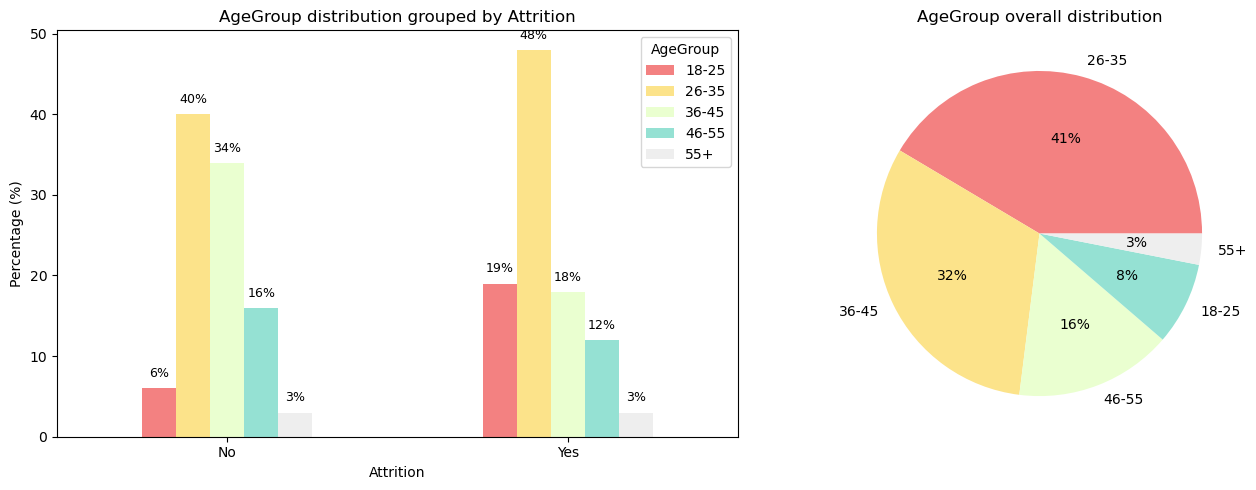


Table View (Grouped by Target %):
AgeGroup   18-25  26-35  36-45  46-55  55+
Attrition                                 
No           6.0   40.0   34.0   16.0  3.0
Yes         19.0   48.0   18.0   12.0  3.0



=== Distribution of 'BusinessTravel' ===


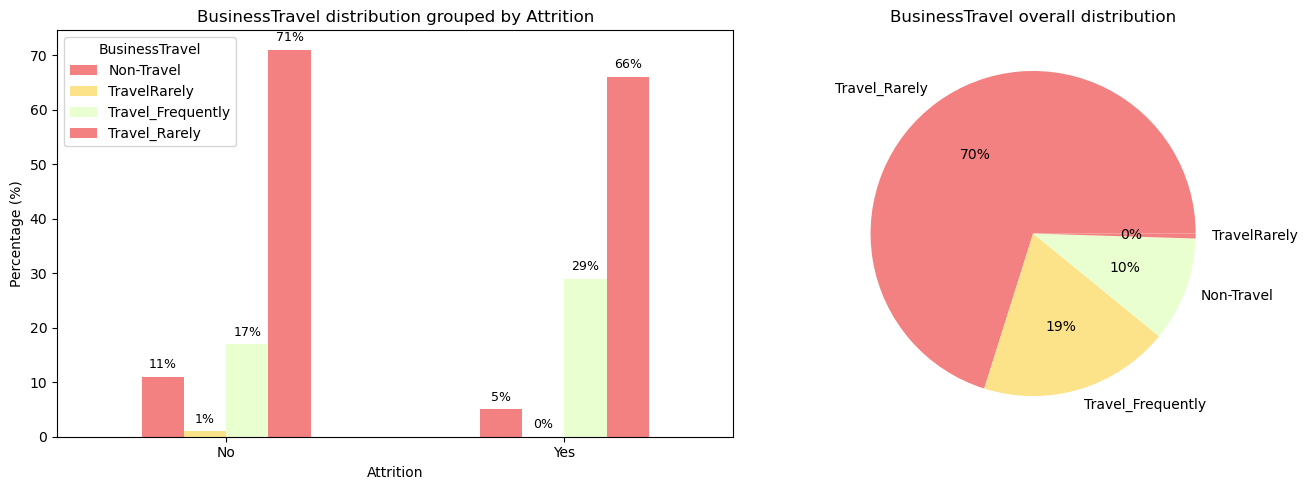


Table View (Grouped by Target %):
BusinessTravel  Non-Travel  TravelRarely  Travel_Frequently  Travel_Rarely
Attrition                                                                 
No                    11.0           1.0               17.0           71.0
Yes                    5.0           0.0               29.0           66.0



=== Distribution of 'Department' ===


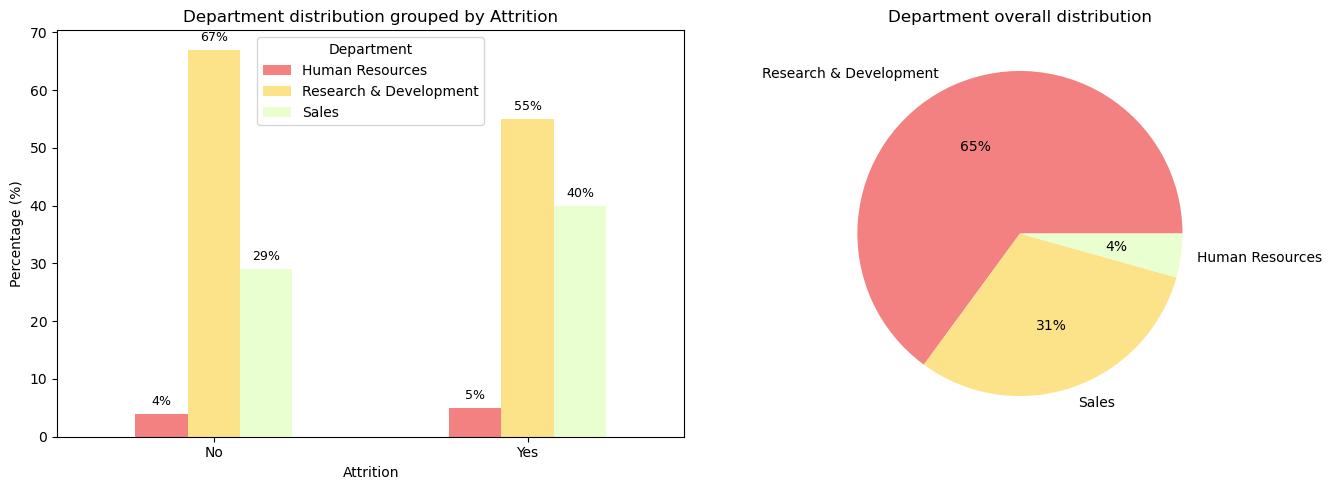


Table View (Grouped by Target %):
Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                      4.0                    67.0   29.0
Yes                     5.0                    55.0   40.0



=== Distribution of 'EducationField' ===


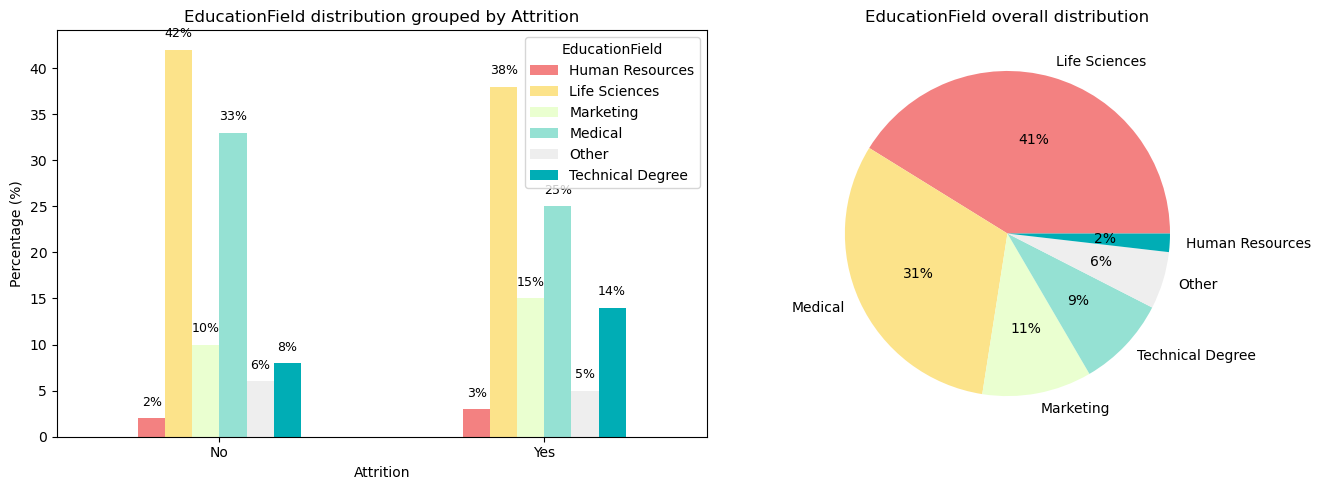


Table View (Grouped by Target %):
EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
No                          2.0           42.0       10.0     33.0    6.0   
Yes                         3.0           38.0       15.0     25.0    5.0   

EducationField  Technical Degree  
Attrition                         
No                           8.0  
Yes                         14.0  



=== Distribution of 'Gender' ===


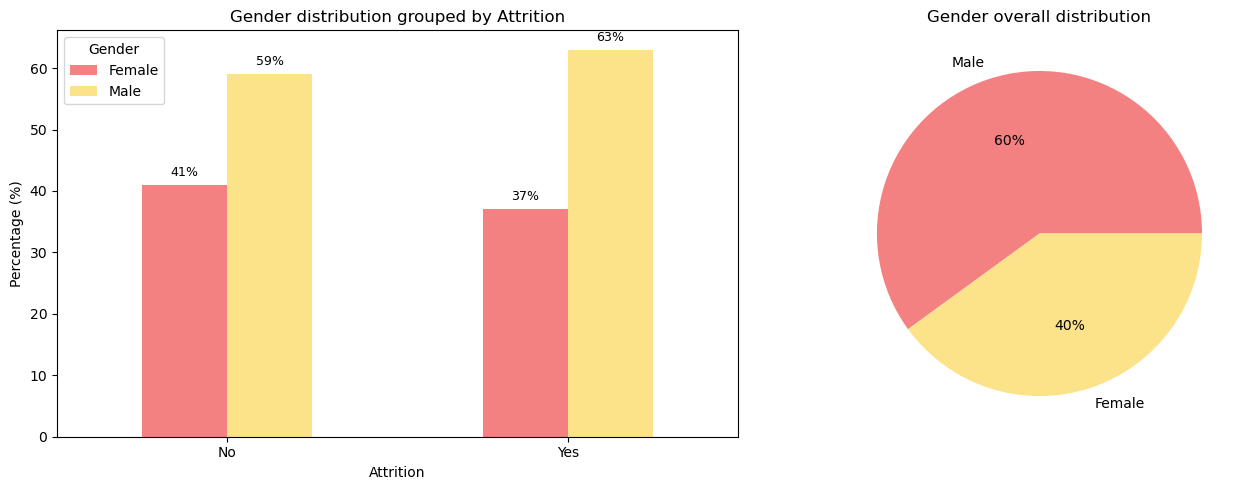


Table View (Grouped by Target %):
Gender     Female  Male
Attrition              
No           41.0  59.0
Yes          37.0  63.0



=== Distribution of 'JobRole' ===


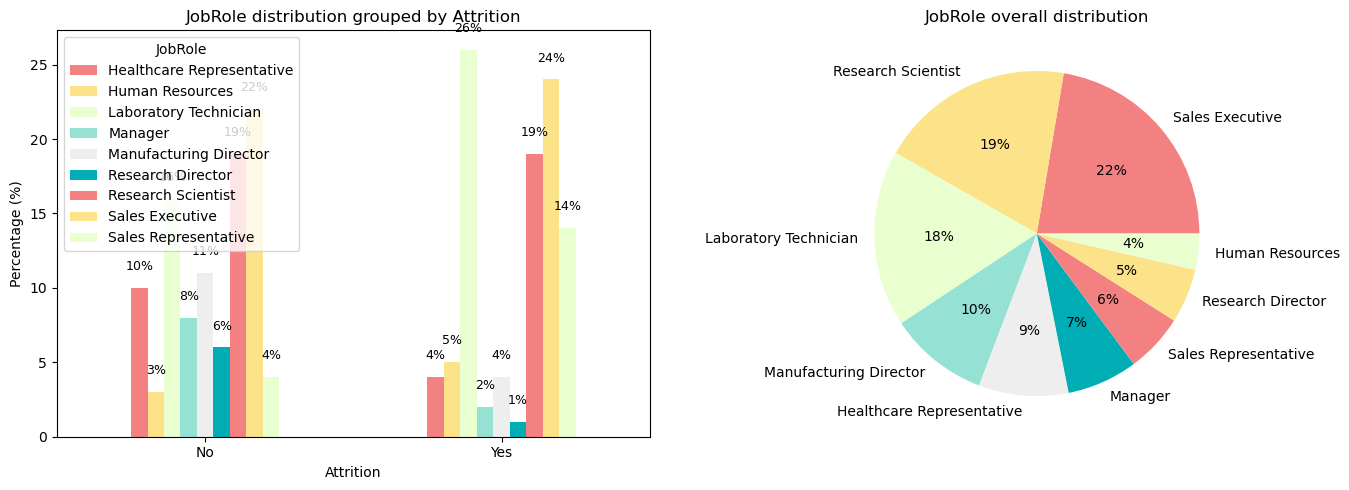


Table View (Grouped by Target %):
JobRole    Healthcare Representative  Human Resources  Laboratory Technician  \
Attrition                                                                      
No                              10.0              3.0                   16.0   
Yes                              4.0              5.0                   26.0   

JobRole    Manager  Manufacturing Director  Research Director  \
Attrition                                                       
No             8.0                    11.0                6.0   
Yes            2.0                     4.0                1.0   

JobRole    Research Scientist  Sales Executive  Sales Representative  
Attrition                                                             
No                       19.0             22.0                   4.0  
Yes                      19.0             24.0                  14.0  



=== Distribution of 'MaritalStatus' ===


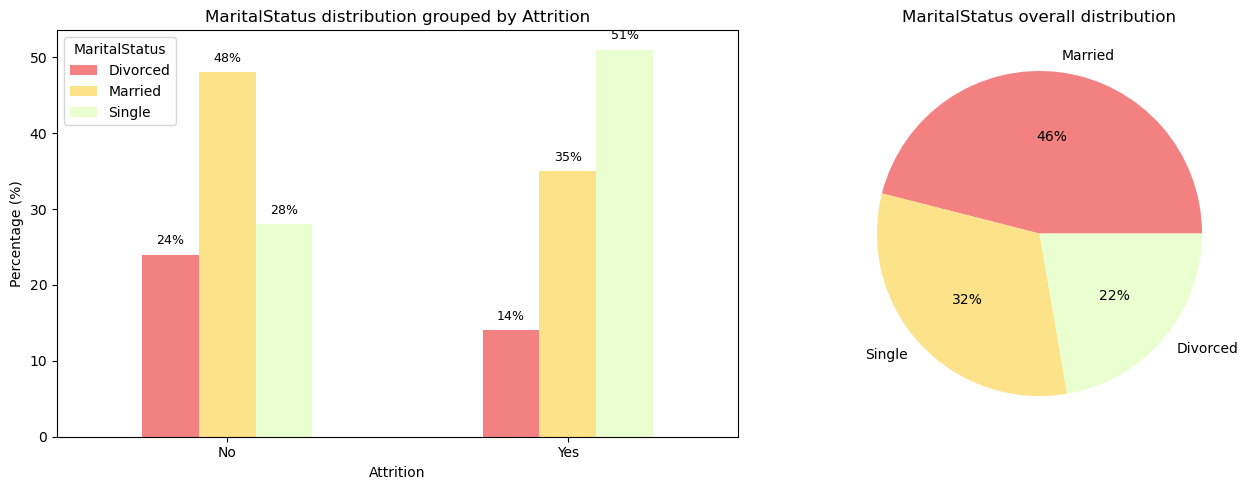


Table View (Grouped by Target %):
MaritalStatus  Divorced  Married  Single
Attrition                               
No                 24.0     48.0    28.0
Yes                14.0     35.0    51.0



=== Distribution of 'SalarySlab' ===


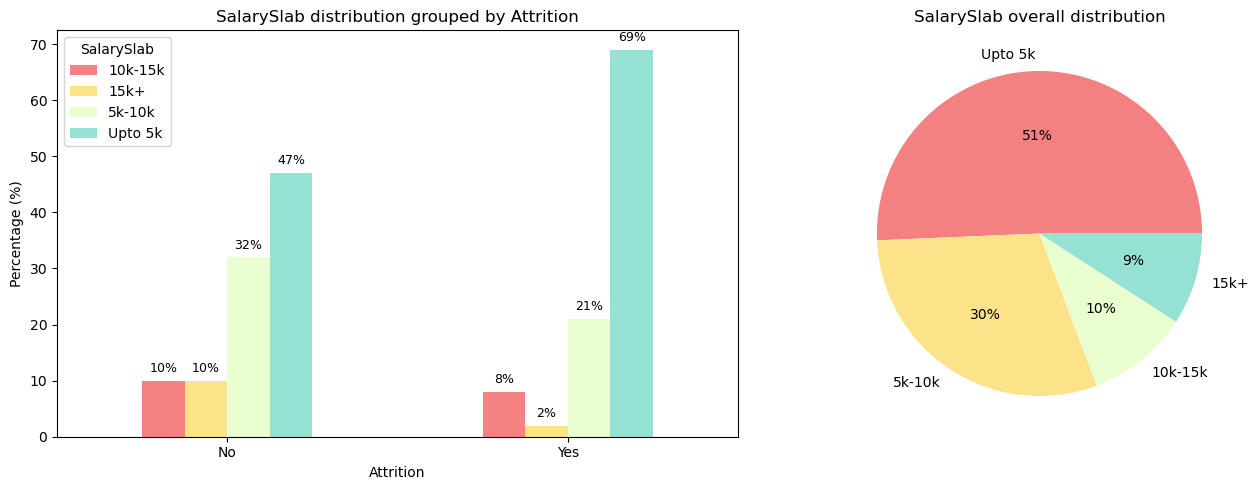


Table View (Grouped by Target %):
SalarySlab  10k-15k  15k+  5k-10k  Upto 5k
Attrition                                 
No             10.0  10.0    32.0     47.0
Yes             8.0   2.0    21.0     69.0



=== Distribution of 'OverTime' ===


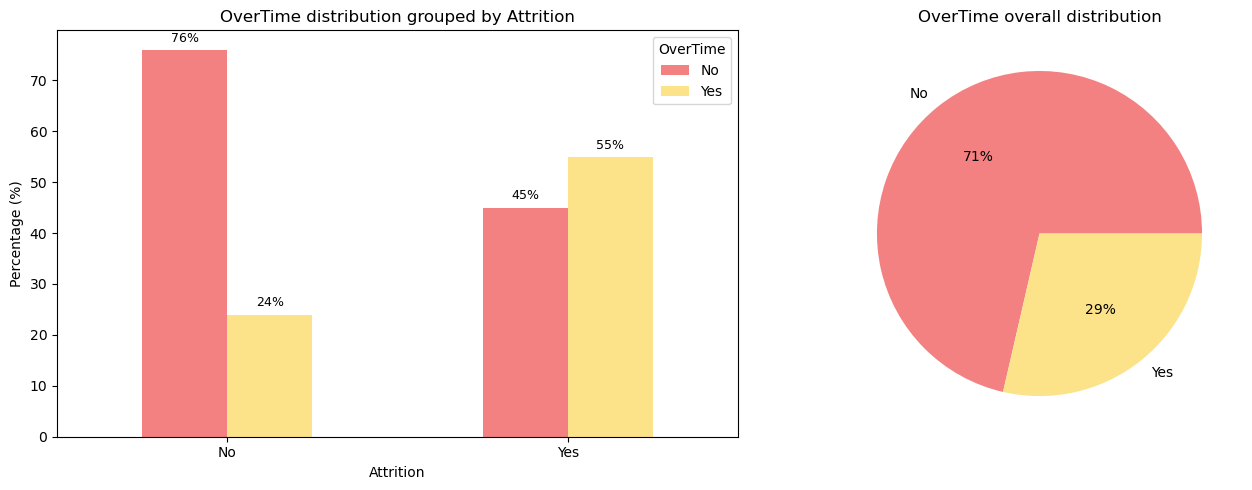


Table View (Grouped by Target %):
OverTime     No   Yes
Attrition            
No         76.0  24.0
Yes        45.0  55.0




In [9]:
# List of columns
#columns_data = df.columns.tolist()

# Function to plot distribution of a categorical feature vs target
def plot_categorical_distribution(feature, target='Attrition'):
    """
    Plots the distribution of a categorical feature.
    Left: bar chart grouped by target
    Right: pie chart for overall distribution
    """
    print(f"\n=== Distribution of '{feature}' ===")

    # Normalized value counts (%) grouped by target
    target_group = round(df.groupby(target)[feature].value_counts(normalize=True, sort=False) * 100)
    
    num_categories = int(target_group.count() / df[target].nunique())  # number of unique categories
    colors = ['#F38181', '#FCE38A', '#EAFFD0', '#95E1D3', '#EEEEEE', '#00ADB5'][:num_categories]

    plt.figure(figsize=(14,5))

    # Bar chart: grouped by target
    plt.subplot(1, 2, 1)
    target_group.unstack().plot(kind='bar', color=colors, ax=plt.gca())
    plt.title(f"{feature} distribution grouped by {target}")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=0)
    
    # Annotate bars
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 1, f"{height:.0f}%", ha='center', va='bottom', fontsize=9)

    # Pie chart: overall distribution
    plt.subplot(1, 2, 2)
    df[feature].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors=colors)
    plt.title(f"{feature} overall distribution")
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

    print("\nTable View (Grouped by Target %):")
    print(target_group.unstack().fillna(0))
    print("\n")

# Plot distribution for all categorical columns except target
for col in categorical_cols:
    if col != 'Attrition':
        plot_categorical_distribution(col, target='Attrition')

/var/folders/dn/6ynt_kvj7q16x61wy32n8bmr0000gn/T/ipykernel_45352/1829227319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


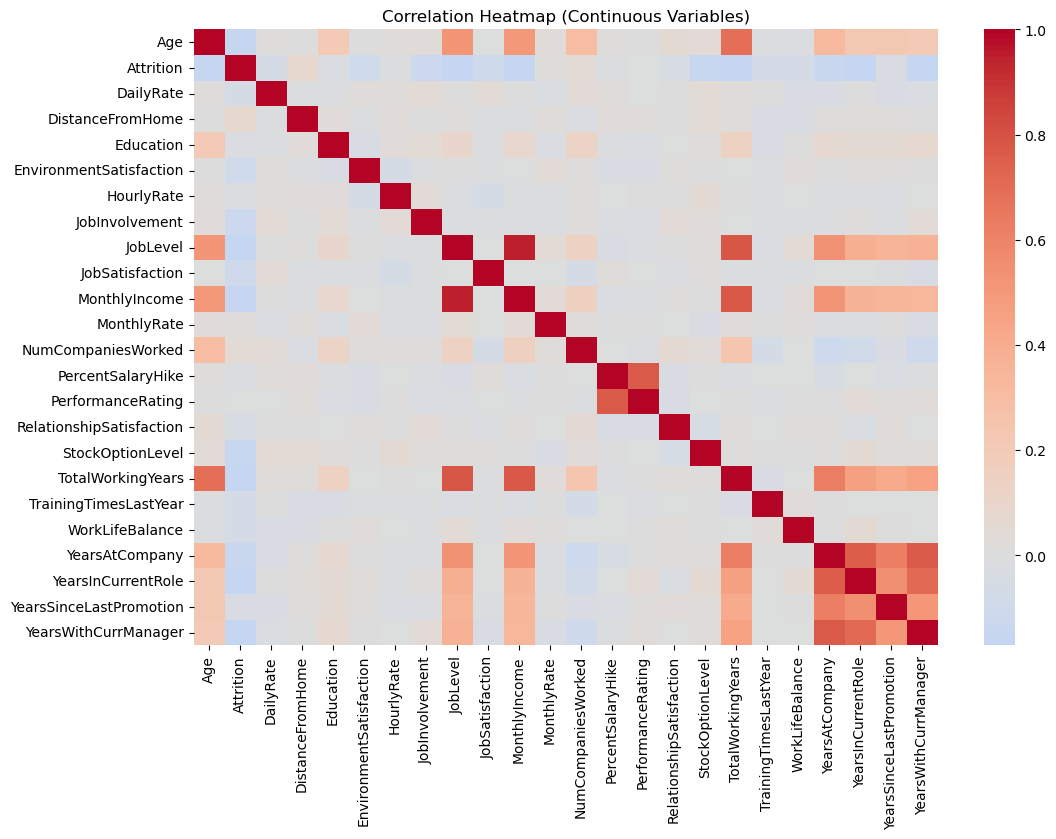

In [10]:
# 將 Attrition 轉成數值
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 選出數值變數
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 計算相關係數
corr = df[num_cols].corr()

# 畫出熱圖
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Continuous Variables)")
plt.show()

In [11]:
corr_target = corr['Attrition'].sort_values(ascending=False)
print(corr_target)

Attrition                   1.000000
DistanceFromHome            0.078189
NumCompaniesWorked          0.042607
MonthlyRate                 0.011572
PerformanceRating          -0.004001
HourlyRate                 -0.008826
PercentSalaryHike          -0.017466
Education                  -0.025496
YearsSinceLastPromotion    -0.036834
RelationshipSatisfaction   -0.039404
DailyRate                  -0.055527
TrainingTimesLastYear      -0.063648
WorkLifeBalance            -0.065047
EnvironmentSatisfaction    -0.098358
JobSatisfaction            -0.102059
JobInvolvement             -0.126244
YearsAtCompany             -0.139072
StockOptionLevel           -0.144639
Age                        -0.153621
MonthlyIncome              -0.162391
YearsWithCurrManager       -0.163367
YearsInCurrentRole         -0.163395
JobLevel                   -0.171050
TotalWorkingYears          -0.171609
Name: Attrition, dtype: float64


In [42]:
df.to_csv('HR_Analytics_cleaned.csv', index=False)

A positive outcome: A 60:40 split is a significant improvement over heavily imbalanced ratios, such as the 70:30 or 80:20 splits that are common in many industries, especially at senior levels.